In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 200

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')
import seaborn as sns

from src.helpers import df_year_split, time_series_me, residual_plot

## stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [2]:
df = pd.read_csv('data/Seasons_stats_complete.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.368,0.0,0.467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,3.6,3.5,0.0,0.0,0.0,0.0,0.0,144.0,516.0,0.279,0.0,0.0,0.0,144.0,516.0,0.279,0.279,170.0,241.0,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.435,0.0,0.387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.6,2.2,0.0,0.0,0.0,0.0,0.0,102.0,274.0,0.372,0.0,0.0,0.0,102.0,274.0,0.372,0.372,75.0,106.0,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.394,0.0,0.259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,2.8,3.6,0.0,0.0,0.0,0.0,0.0,174.0,499.0,0.349,0.0,0.0,0.0,174.0,499.0,0.349,0.349,90.0,129.0,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.312,0.0,0.395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.6,0.0,0.0,0.0,0.0,0.0,22.0,86.0,0.256,0.0,0.0,0.0,22.0,86.0,0.256,0.256,19.0,34.0,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.308,0.0,0.378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.1,-0.6,0.0,0.0,0.0,0.0,0.0,21.0,82.0,0.256,0.0,0.0,0.0,21.0,82.0,0.256,0.256,17.0,31.0,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [4]:
drop_me = ['Unnamed: 0', 'Year', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%', 'ORB', 'DRB', 'USG%']

In [5]:
# def df_year_split(df, year, drop_columns):
    
#     return df[df['Year']==year].drop(columns=drop_columns).drop_duplicates('Player').reset_index().drop(columns='index')

In [6]:
df_2011 = df_year_split(df, 2011, drop_me)
df_2012 = df_year_split(df, 2012, drop_me)
df_2013 = df_year_split(df, 2013, drop_me)
df_2014 = df_year_split(df, 2014, drop_me)
df_2015 = df_year_split(df, 2015, drop_me)
df_2016 = df_year_split(df, 2016, drop_me)
df_2017 = df_year_split(df, 2017, drop_me)
df_2018 = df_year_split(df, 2018, drop_me)
df_2019 = df_year_split(df, 2019, drop_me)

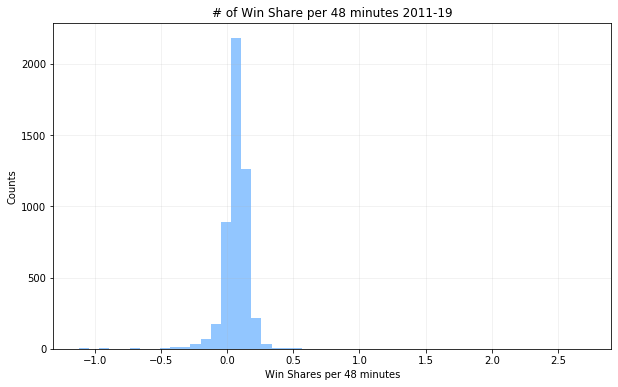

In [7]:
WS_scores = df[df['Year']>2011]['WS/48']
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('# of Win Share per 48 minutes 2011-19')
ax.set_xlabel('Win Shares per 48 minutes')
ax.set_ylabel('Counts')
ax.grid(alpha=.2)
plt.savefig('img/ws48_hist')

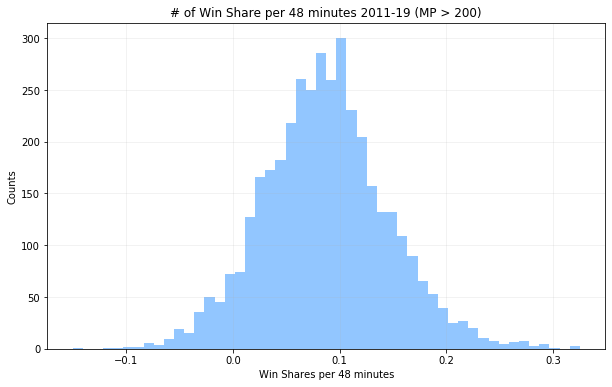

In [8]:
WS_scores = df[(df['Year']>2011) & (df['MP']>200)]['WS/48']
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(WS_scores,bins=50)
ax.set_title('# of Win Share per 48 minutes 2011-19 (MP > 200)')
ax.set_xlabel('Win Shares per 48 minutes')
ax.set_ylabel('Counts')
ax.grid(alpha=.2)
plt.savefig('img/ws48_hist_200')

In [9]:
drop_me2 = ['Unnamed: 0', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG%', '3P%', '2P%',
       'eFG%', 'FT%', 'ORB', 'DRB', 'USG%']

In [10]:
x_for_plots = df[((df['Year']==2011) | (df['Year']==2019)) & (df['MP']>200)].drop(columns=drop_me2).reset_index().drop(columns='index')
y_for_plots = df[((df['Year']==2011) | (df['Year']==2019)) & (df['MP']>200)].drop(columns=drop_me2).reset_index().drop(columns='index')[['Year','WS/48']]
columns = x_for_plots.columns

In [11]:
color_map = {2011.0:'black', 2019.0:'red'}

In [ ]:
fig, ax = plt.subplots(len(columns),1, figsize=(15,200))
for i, col in enumerate(columns):
    ax[i].scatter(x_for_plots[col], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('WS/48')
    ax[i].grid(alpha=.2)

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['BLK'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('BLK')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/blk_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['FTA'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('FTA')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/fta_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['FT'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('FT')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/ft_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['3PA'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('3PA')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/3pa_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['3P'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('3P')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/3p_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['Pos'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('Pos')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/pos_ws48')

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(x_for_plots['Year'], y_for_plots['WS/48'],c=x_for_plots['Year'].map(color_map),alpha=0.5)
# ax.set_xlabel('Year')
# ax.set_ylabel('WS/48')
# ax.grid(alpha=.2)
# plt.savefig('img/year_ws48')

In [ ]:
# df[(df['Year']>2010) & (df['MP']>200)].boxplot(column='WS/48', by='Year',figsize=(10,10))
# plt.savefig('img/ws48_boxplot.png')

In [ ]:
# def time_series_me(df1,df2,df3,df_for_y):
    
#     time_series_df = df1.copy()
    
#     time_series_df = df1.set_index('Player')\
#                         .join(df2.set_index('Player'),lsuffix='_1', rsuffix='_2',how='outer')\
#                         .join(df3.set_index('Player'),lsuffix='_2', rsuffix='_3',how='outer')\
#                         .join(df_for_y.set_index('Player'),lsuffix='_3', rsuffix='_4',how='outer')\
#                         .reset_index()
    
#     time_series_df = time_series_df[time_series_df['MP_4']>200].dropna(subset=['TRB_3', 'TRB_4'])
#     time_series_df = time_series_df.fillna(0)
    
#     columns_to_drop = ['Player', 'Pos_1', 'Tm_1', 'Pos_2',
#        'Tm_2', 'Pos_3', 'Tm_3',
#        'Pos_4', 'Age_4', 'Tm_4', 'G_4', 'MP_4',
#        'WS_4', 'WS/48_4', 'FG_4', 'FGA_4', '3P_4', '3PA_4', '2P_4', '2PA_4',
#        'FT_4', 'FTA_4', 'TRB_4', 'AST_4', 'STL_4', 'BLK_4', 'TOV_4', 'PF_4',
#        'PTS_4']
#     X = time_series_df.drop(columns=columns_to_drop)
#     y = time_series_df['WS/48_4']
    
#     return time_series_df,X,y

In [ ]:
df_2011_14,X20112014,y20112014 = time_series_me(df_2011,df_2012,df_2013,df_2014)
df_2012_15,X20122015,y20122015 = time_series_me(df_2012,df_2013,df_2014,df_2015)
df_2013_16,X20132016,y20132016 = time_series_me(df_2013,df_2014,df_2015,df_2016)
df_2014_17,X20142017,y20142017 = time_series_me(df_2014,df_2015,df_2016,df_2017)
df_2015_18,X20152018,y20152018 = time_series_me(df_2015,df_2016,df_2017,df_2018)
df_2016_19,X20162019,y20162019 = time_series_me(df_2016,df_2017,df_2018,df_2019)

In [ ]:
df_2020_predict,X_2020_predict,_ = time_series_me(df_2017,df_2018,df_2019,df_2016)

In [ ]:
X_appended = pd.concat([X20112014,X20122015,X20132016,X20142017,X20152018],ignore_index=True)
y_appended = pd.concat([y20112014,y20122015,y20132016,y20142017,y20152018],ignore_index=True)

In [ ]:
rf = RandomForestRegressor(oob_score=True,n_jobs=-1)
rf.fit(X_appended,y_appended)

print('OOB Score: {}'.format(rf.oob_score_))
print('r2 score on test: {}'.format(rf.score(X20162019,y20162019)))

rf_predict_2019 = rf.predict(X20162019)
mse = mean_squared_error(y20162019,rf_predict_2019)

print('MSE: {}'.format(mse))

In [ ]:
# def residual_plot(ax, x, y, y_hat, n_bins=50):
#     residuals = y - y_hat
#     ax.axhline(0, color="black", linestyle="--")
#     ax.scatter(x, residuals, color="grey", alpha=0.5)
#     ax.set_ylabel("Residuals ($y - \hat y$)")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
residual_plot(ax, rf_predict_2019, y20162019, rf_predict_2019)
ax.axhline((rf_predict_2019-y20162019).mean())
ax.set_title("Residuals by Predicted Values")
ax.set_xlabel("$\hat y$")

print(f'Residuals mean: {(rf_predict_2019-y20162019).mean()}')

In [ ]:
df_2016_19['rf_predict_2019'] = rf_predict_2019
df_2016_19[['Player','WS/48_4','rf_predict_2019']].sort_values('rf_predict_2019',ascending=False).head(20)

In [ ]:
rf_predict_2020 = rf.predict(X_2020_predict)

In [ ]:
df_2020_predict['2020_WS/48_prediction'] = rf_predict_2020
df_2020_predict[['Player','2020_WS/48_prediction']].sort_values('2020_WS/48_prediction',ascending=False).head(20)

In [ ]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [4,6,8,10,20,50],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_leaf': [3, 4, 5, 6],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [50,100, 150, 200],
#     'n_jobs': [-1]
# }

# rf = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)

# grid_search.fit(X_appended,y_appended)

In [ ]:
# grid_search.best_params_

In [ ]:
rf_best = RandomForestRegressor(bootstrap=True,
                                max_depth=50,
                                max_features='sqrt',
                                min_samples_leaf=4,
                                min_samples_split=12,
                                n_estimators=200,
                               oob_score=True,
                               n_jobs=-1)
rf_best.fit(X_appended,y_appended)
print('OOB Score: {}'.format(rf_best.oob_score_))
print('r2 score on test: {}'.format(rf_best.score(X20162019,y20162019)))

rf_best_predict = rf_best.predict(X20162019)
mse = mean_squared_error(y20162019,rf_best_predict)

print('MSE: {}'.format(mse))

In [ ]:
rf_best_predict_2020 = rf_best.predict(X_2020_predict)

In [ ]:
df_2020_predict['2020_WS/48_prediction'] = rf_best_predict_2020
df_2020_predict[['Player','2020_WS/48_prediction']].sort_values('2020_WS/48_prediction',ascending=False).head(20)

In [ ]:
feat_scores = pd.Series(rf_best.feature_importances_,
                           index=X_appended.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(15,15))
ax.set_title('Feature Importance')
ax.set_xlabel('Average contribution to information gain')
plt.savefig('img/rf_best_feature_importance.png')

In [ ]:
result = permutation_importance(rf_best, X_appended, y_appended, n_repeats=10,
                                random_state=1, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_appended.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.savefig('img/rf_best_permutation_importance.png')

In [ ]:
ws48_2020 = pd.read_csv('data/2020_ws48_top20.csv')
ws48_2020.drop(columns='Rk')